# Exercise 6
## Index No : 190696U
## Name : Wijegunawardana C.H.W.

In [14]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

1. Fit Houghlines to the Soduko image in Fing. 1.

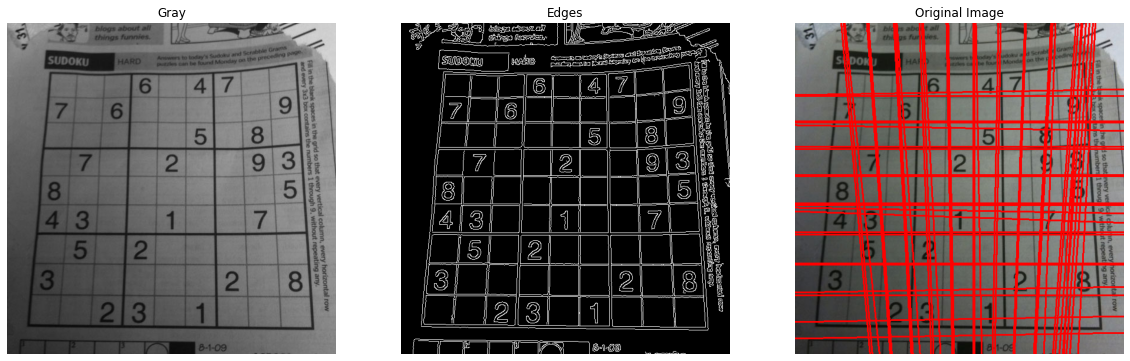

In [15]:
# Importing the image
img = cv.imread('sudoku.png', cv.IMREAD_COLOR)
assert img is not None

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 20, 120, apertureSize = 3)
lines = cv.HoughLines(edges, 1, np.pi/180, 175)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0,y0 = a*rho,b*rho
    x1,y1 = int(x0+1000*(-b)), int(y0+1000*(-a))
    x2,y2 = int(x0-1000*(-b)), int(y0-1000*(-a))
    cv.line(img, (x1,y1),(x2,y2),(0,0,255),2)

# cv.namedWindow("Image",cv.WINDOW_NORMAL)
# cv.imshow("Image", gray)
# cv.waitKey()
# cv.imshow("Image", edges)
# cv.waitKey()
# cv.imshow("Image", img)
# cv.waitKey()
# cv.destroyAllWindows()

fig,ax=plt.subplots(1,3,figsize=(20,20))
ax[0].set_title('Gray')
ax[0].imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))
ax[1].set_title('Edges')
ax[1].imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB))
ax[2].set_title('Original Image')
ax[2].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

for i in range(3):
    ax[i].axis("off")

plt.show()


2. Fit Hough circles to the coins image in Fing. 3.

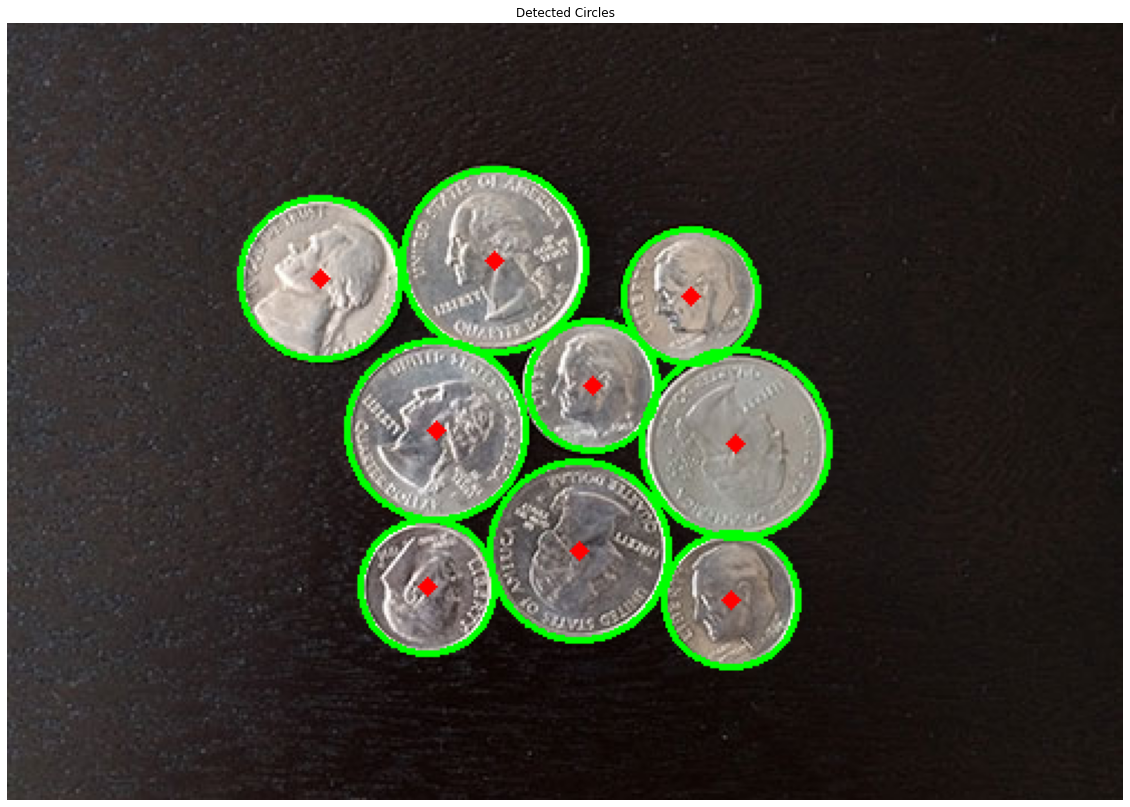

In [16]:
# Importing the image
img = cv.imread('coins.jpg', cv.IMREAD_COLOR)
assert img is not None

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray,5)
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,50, param1=150,param2=20,minRadius=20,maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(img,(i[0],i[1]),2,(0,0,255),3)
# cv.imshow('detected circles',img)
# cv.waitKey(0)
# cv.destroyAllWindows()

fig,ax=plt.subplots(1,1,figsize=(20,20))
ax.set_title('Detected Circles')
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax.axis("off")
plt.show()

3. Use generalized Hough transform to match the template with the image.

x = 29.0, y = 109.0.scale = 1.0, orientation = 0.0, p1 = (4, 76), p2 = (54, 141)


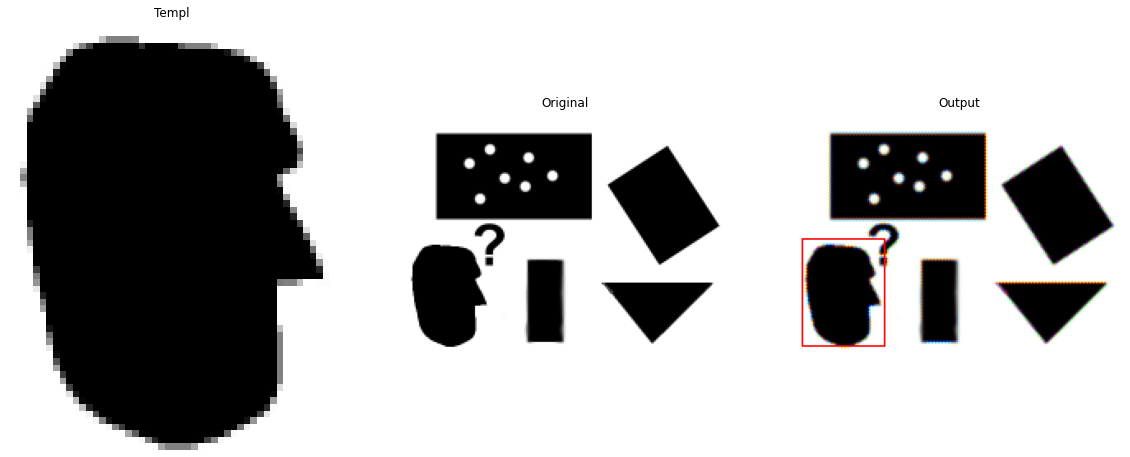

In [17]:
# Importing the image
im = cv.imread('pic1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
templ = cv.imread('templ.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

im_edges = cv.Canny(im, 50, 250)
templ_edges = cv.Canny(templ, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(im_edges)

out = cv.cvtColor(im, cv.COLOR_BAYER_BG2BGR)
for x,y,scale,orientation in positions[0]:
    halfHeight = templ.shape[0] / 2. * scale
    halfWidth = templ.shape[1] / 2. * scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("x = {}, y = {}.scale = {}, orientation = {}, p1 = {}, p2 = {}".format(x,y,scale,orientation,p1,p2))
    cv.rectangle(out, p1, p2, (0,0,255))

# cv.namedWindow("Image",cv.WINDOW_NORMAL)
# cv.imshow("Image", templ)
# cv.waitKey()
# cv.imshow("Image", im)
# cv.waitKey()
# cv.imshow("Image", out)
# cv.waitKey()
# cv.destroyAllWindows()

fig,ax=plt.subplots(1,3,figsize=(20,20))
ax[0].set_title('Templ')
ax[0].imshow(cv.cvtColor(templ, cv.COLOR_BGR2RGB))
ax[1].set_title('Original')
ax[1].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[2].set_title('Output')
ax[2].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))

for i in range(3):
    ax[i].axis("off")

plt.show()

4. Using he given code (item no. 1), experiment with various types of 2-D transformations.

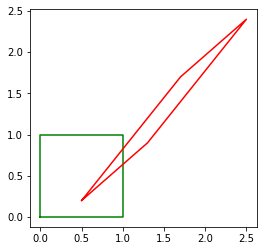

In [18]:
import matplotlib.pyplot as plt

a, b, c, d = [0, 0, 1],[0, 1, 1],[1, 1, 1],[1, 0, 1]
X = np.array([a,b,c,d]).T

theta = np.pi*30/180
s = 2
tx,ty = 0.5,0.2
H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx],[s*np.sin(theta), s*np.cos(theta), ty], [0, 0, 1]])
Y = H @ X

a11, a12, a21, a22 = 0.8, 1.2, 0.7, 1.5
A = np.array([[a11, a12, tx],[a21, a22, ty], [0, 0, 1]])
Y = A @ X

x = np.append(X[0,:],X[0,0])
y = np.append(X[1,:],X[1,0])

fig, ax = plt.subplots(1,1)
ax.plot(x,y, color = 'g')
ax.set_aspect('equal')

x = np.append(Y[0,:],Y[0,0])
y = np.append(Y[1,:],Y[1,0])

ax.plot(x,y, color = 'r')
ax.set_aspect('equal')
plt.show()



5. Transform Graffiti img1.ppm onto img5.ppm using code in item no. 2.

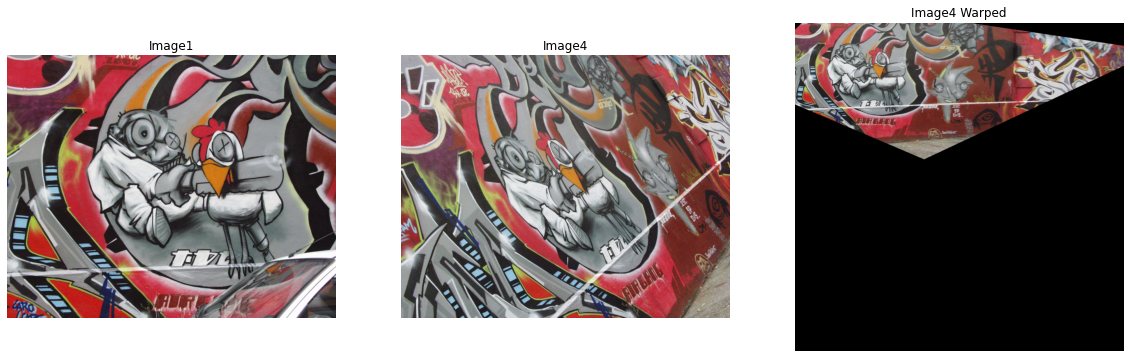

In [19]:
#reading image
img1 = cv.imread('graf/img1.ppm', cv.IMREAD_ANYCOLOR)  
img4= cv.imread('graf/img4.ppm', cv.IMREAD_ANYCOLOR) 

H = np.array([[6.6378505e-01,   6.8003334e-01,  -3.1230335e+01],[-1.4495500e-01 ,  9.7128304e-01,   1.4877420e+02],[4.2518504e-04,  -1.3930359e-05,   1.0000000e+00]])

img4to1 = cv.warpPerspective(img4, np.linalg.inv(H), (2000,2000))

# cv.namedWindow("Image",cv.WINDOW_NORMAL)
# cv.imshow("Image1", img1)
# cv.waitKey()
# cv.imshow("Image4", img4)
# cv.waitKey()
# cv.imshow("Image4 Warped", img4to1)
# cv.waitKey()
# cv.destroyAllWindows()

fig,ax=plt.subplots(1,3,figsize=(20,20))
ax[0].set_title('Image1')
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[1].set_title('Image4')
ax[1].imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB))
ax[2].set_title('Image4 Warped')
ax[2].imshow(cv.cvtColor(img4to1, cv.COLOR_BGR2RGB))

for i in range(3):
    ax[i].axis("off")

plt.show()